<a href="https://colab.research.google.com/github/YangHyunu/Signiture/blob/main/17_cnn_binary_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN 이진분류 (컬러 이미지)
- 개와 고양이 데이터셋

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

time: 379 µs (started: 2024-07-12 23:43:17 +00:00)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

time: 14.9 s (started: 2024-07-12 23:43:17 +00:00)


## 1.데이터 준비
  - train, test 데이터가 각 레이블 별로 분리돼어있음
  - 결측치나 이상값에 대해 신경 쓸 필요 x

In [3]:
# !gdown  https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

time: 258 µs (started: 2024-07-12 23:43:32 +00:00)


In [4]:
# !unzip /content/cats_and_dogs.zip # 압축해제

time: 240 µs (started: 2024-07-12 23:43:32 +00:00)


In [5]:
data_root ='/content/cats_and_dogs'
train_dir =data_root + '/train'
test_dir = data_root + '/test'

print(train_dir)
print(test_dir)

/content/cats_and_dogs/train
/content/cats_and_dogs/test
time: 696 µs (started: 2024-07-12 23:43:32 +00:00)


## 2. 데이터 로딩  (수동으로)

In [6]:
class_name = ['cats','dogs']

time: 312 µs (started: 2024-07-12 23:43:32 +00:00)


os.listdir(train_dir + '/cats'):

    train_dir 변수에 저장된 디렉토리 경로에 /cats를 추가하여 전체 경로를 만듬
    os.listdir() 함수는 해당 디렉토리 (train_dir + '/cats') 내의 파일 및 디렉토리 목록을 반환.

In [7]:
import os

train_cats_fnames=os.listdir(train_dir + '/cats')
train_dogs_fnames=os.listdir(train_dir + '/dogs')

time: 6.43 ms (started: 2024-07-12 23:43:32 +00:00)


- 이미지 데이터를 불러와 저장하기

In [8]:
import PIL # 이미지 처리를 위한 라이브러리
X_train =[]
y_train =[]

for fname in train_cats_fnames:
  image = PIL.Image.open(train_dir + '/cats/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 객체를 (224, 224) 크기로 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_train.append(arr) # X_train에 이미지 numpy 배열 저장
  y_train.append(0)  # y_train에 이미지의 레이블 저장 | 고양이는 0 , class_name = ['cats','dogs']

len(X_train), len(y_train)

(1300, 1300)

time: 10.6 s (started: 2024-07-12 23:43:32 +00:00)


In [9]:
for fname in train_dogs_fnames:
  image = PIL.Image.open(train_dir + '/dogs/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 객체를 (224, 224) 크기로 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_train.append(arr)
  y_train.append(1) # 개는 1 , class_name = ['cats','dogs']

len(X_train), len(y_train)

(2600, 2600)

time: 13 s (started: 2024-07-12 23:43:43 +00:00)


In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(type(X_train),type(y_train))
print(X_train.shape, y_train.shape) # 컬러라 차원이 3 흑백은 없거나 1

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2600, 224, 224, 3) (2600,)
time: 227 ms (started: 2024-07-12 23:43:56 +00:00)


## 3. 학습 , 검증 데이터 분리

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid= train_test_split(X_train,y_train,test_size=0.2
                                                  ,random_state=42
                                                  ,shuffle=True)

print(X_train.shape,X_valid.shape)
print(y_train.shape,y_valid.shape)


(2080, 224, 224, 3) (520, 224, 224, 3)
(2080,) (520,)
time: 506 ms (started: 2024-07-12 23:43:56 +00:00)


- 이미지 확인

array([[[ 64,  79,  86],
        [ 57,  72,  79],
        [ 53,  68,  75],
        ...,
        [120, 139, 154],
        [115, 133, 145],
        [ 98, 116, 125]],

       [[ 64,  79,  86],
        [ 67,  82,  89],
        [ 67,  82,  89],
        ...,
        [122, 141, 155],
        [118, 136, 148],
        [100, 118, 130]],

       [[ 67,  81,  89],
        [ 67,  81,  89],
        [ 67,  81,  89],
        ...,
        [124, 143, 158],
        [122, 140, 154],
        [103, 120, 135]],

       ...,

       [[ 91, 107, 120],
        [ 93, 109, 122],
        [ 87, 102, 119],
        ...,
        [ 90,  97,  97],
        [ 94,  99,  97],
        [ 86,  90,  87]],

       [[ 90, 106, 119],
        [ 90, 106, 120],
        [ 85, 100, 116],
        ...,
        [ 82,  89,  89],
        [ 88,  93,  92],
        [ 80,  84,  83]],

       [[ 89, 105, 118],
        [ 88, 104, 117],
        [ 83,  99, 115],
        ...,
        [ 72,  79,  79],
        [ 82,  87,  86],
        [ 76,  80,  79]]], dtype=uint8)
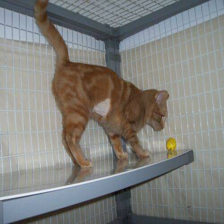

time: 71.9 ms (started: 2024-07-12 23:43:57 +00:00)


In [12]:
X_train[0]

- 데이터 보기

In [13]:
np.random.seed(42)
sample = np.random.randint(2080,size=25)
sample # 2080개의 데이터 중 랜덤하게 선택된 25 개의 데이터의 INDEX값을 가짐

array([ 860, 1294, 1130, 1095, 1638,  466, 1238,  330, 1482,  130, 1685,
        769, 1515, 1215,  955, 1184,  459,   21,  747,  474, 1082, 2047,
        975, 1806,  189])

time: 12.6 ms (started: 2024-07-12 23:43:57 +00:00)


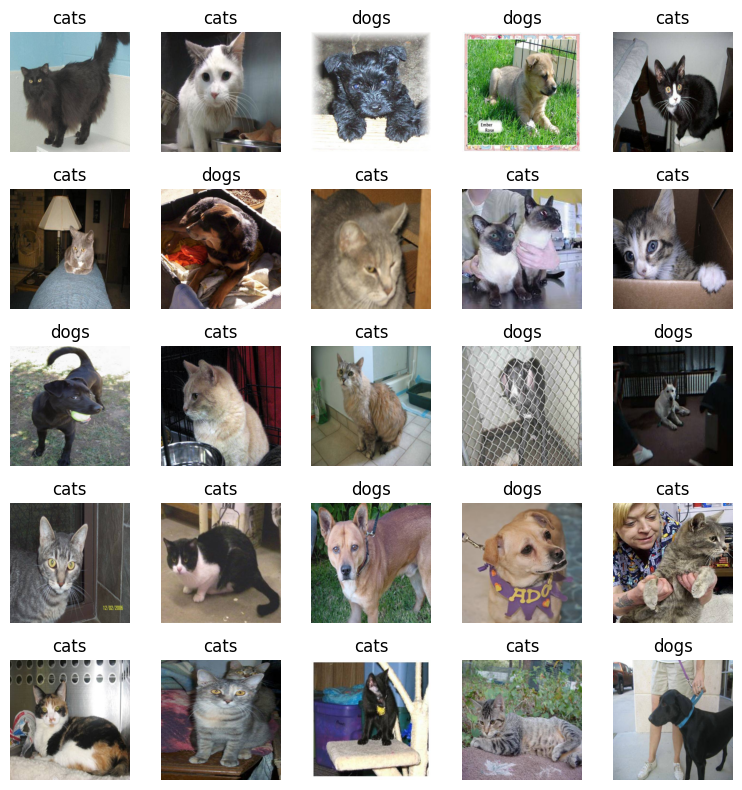

time: 6.9 s (started: 2024-07-12 23:43:57 +00:00)


In [14]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5,i+1) # 25개 grid
  plt.imshow(X_train[idx],cmap='gray')
  plt.title(class_name[y_train[idx]]) # 정답값 표시
  plt.axis('off')
  plt.tight_layout()
plt.show()

## 4. 전처리
  - 스케일링
  - 원-핫 인코딩 X (이진 분류 라서 안해도 됨)

In [15]:
X_train_s = X_train.astype('float')/255.
X_valid_s = X_valid.astype('float')/255.


time: 1.17 s (started: 2024-07-12 23:44:04 +00:00)


## 5. 모델

In [16]:
X_train_s.shape

(2080, 224, 224, 3)

time: 2.62 ms (started: 2024-07-12 23:44:05 +00:00)


Dropout 레이어를 추가한 모델을 구성
padding ='same'으로 두어 입력 이미지의 크기를 유지시킴
Default는 padding = 'valid'

In [17]:
from keras import layers
model = keras.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=3,activation='relu',
                  input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))

time: 900 ms (started: 2024-07-12 23:44:05 +00:00)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

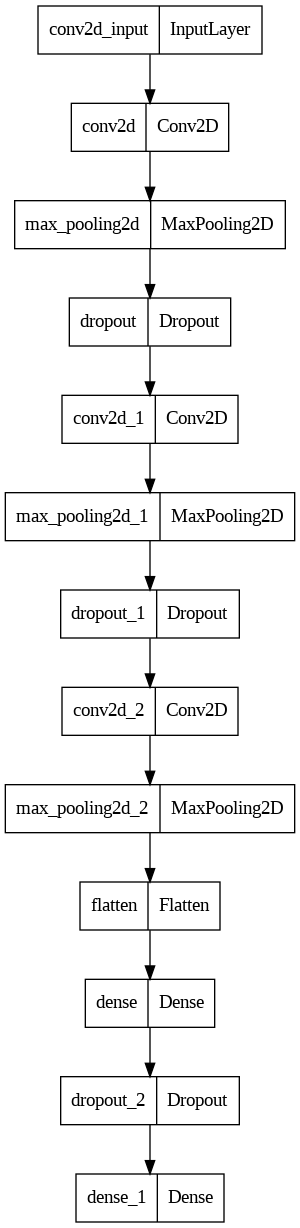

time: 294 ms (started: 2024-07-12 23:44:06 +00:00)


In [19]:
from keras import utils
utils.plot_model(model)

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

time: 15.7 ms (started: 2024-07-12 23:44:06 +00:00)


### 하이퍼 파라미터 튜닝
  - Early Stopping & Model Checkpoint
  - Easrly Stopping: 모델 학습 도중 과적합(overfitting)을 방지하기 위해, 특정 조건이 만족될 때 학습을 조기에 종료
  - Model Checkpoint: 학습 도중 주기적으로 모델의 가중치를 저장
   
  - save_weights_only: True로 설정하면 모델의 가중치만 저장하고, False로 설정하면 전체 모델(구조 포함)을 저장합니다.
  - save_best_only: True로 설정하면 모니터링 지표가 개선될 때만 모델 가중치를 저장합니다. 이를 통해 최적의 모델만 저장할 수 있습니다.

In [21]:
from keras import callbacks
es = callbacks.EarlyStopping(
    monitor='val_loss',patience=5)
ckpt_path='/temp/cats_dogs.ckpt'
ckpt = callbacks.ModelCheckpoint(
    filepath=ckpt_path,
    monitor='val_loss',
    save_weight_only=True,
    save_best_only=True)

time: 631 µs (started: 2024-07-12 23:44:06 +00:00)


- epoch 가 한번 끝날 때 마다 callback, model checkpoint 호출

In [22]:
EPOCHS= 50
BATCH_SIZE= 32
history = model.fit(X_train_s, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[es, ckpt],
                    validation_data=(X_valid_s, y_valid)) # Pass validation data as a tuple (features, labels)
                    # epoch 가 한번 끝날 때 마다 callback, model checkpoint 호출

Epoch 1/50
65/65 [==============================] - 13s 93ms/step - loss: 0.8632 - accuracy: 0.5308 - val_loss: 0.6894 - val_accuracy: 0.5096
Epoch 2/50
65/65 [==============================] - 5s 77ms/step - loss: 0.6840 - accuracy: 0.5663 - val_loss: 0.6779 - val_accuracy: 0.5885
Epoch 3/50
65/65 [==============================] - 3s 48ms/step - loss: 0.6751 - accuracy: 0.5798 - val_loss: 0.6876 - val_accuracy: 0.5481
Epoch 4/50
65/65 [==============================] - 4s 64ms/step - loss: 0.6595 - accuracy: 0.6197 - val_loss: 0.6608 - val_accuracy: 0.5904
Epoch 5/50
65/65 [==============================] - 3s 54ms/step - loss: 0.6200 - accuracy: 0.6707 - val_loss: 0.6661 - val_accuracy: 0.5904
Epoch 6/50
65/65 [==============================] - 4s 67ms/step - loss: 0.5813 - accuracy: 0.6962 - val_loss: 0.6314 - val_accuracy: 0.6500
Epoch 7/50
65/65 [==============================] - 3s 47ms/step - loss: 0.5214 - accuracy: 0.7423 - val_loss: 0.6610 - val_accuracy: 0.6058
Epoch 8/50
6

  - 에포크 13번에서 모델 학습이 종료된 것을 볼 수 있다.

### ▶ 학습 곡선 시각화

In [23]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 1.17 ms (started: 2024-07-12 23:45:07 +00:00)


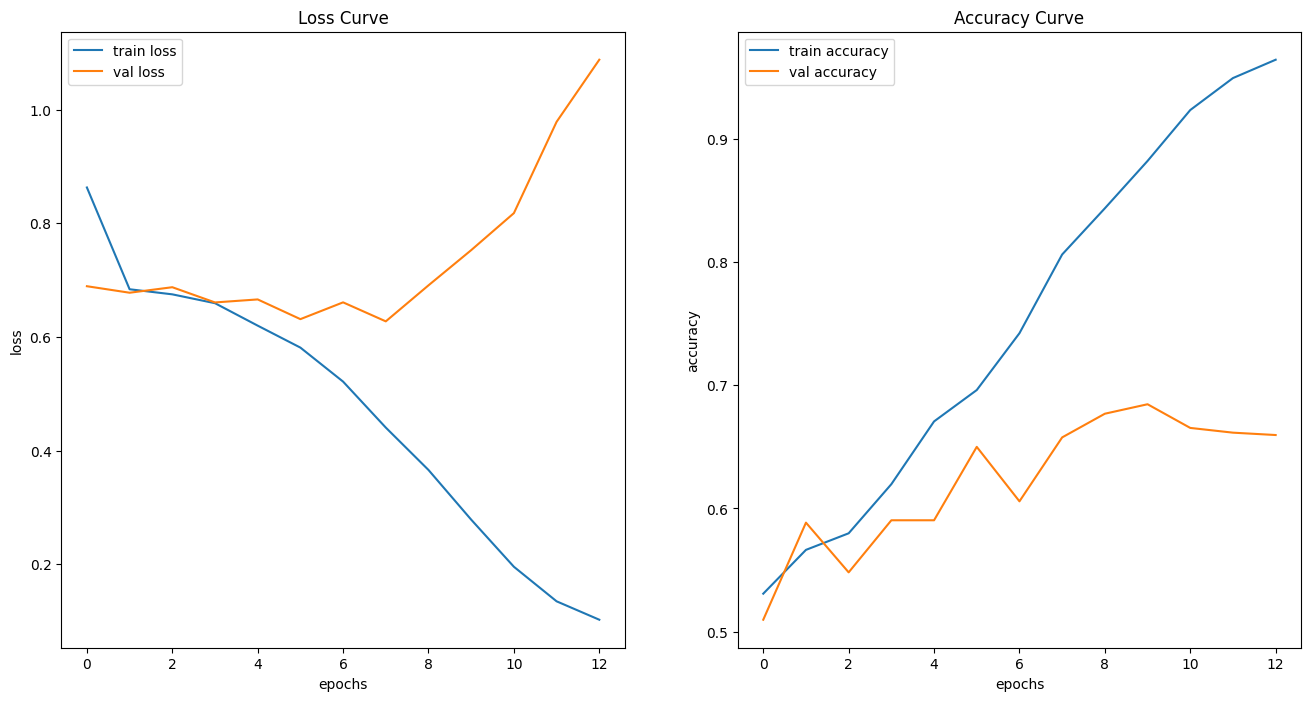

time: 26 s (started: 2024-07-12 23:45:07 +00:00)


In [24]:
plot_history(history)

In [25]:
model.load_weights(ckpt_path)  # 데이터 불러오기

time: 86.6 ms (started: 2024-07-12 23:45:33 +00:00)


## 6.검증

In [26]:
# 테스트 데이터 전처리
# 평가

time: 302 µs (started: 2024-07-12 23:45:33 +00:00)


In [27]:
test_cats_fnames=os.listdir(test_dir + '/cats')
test_dogs_fnames=os.listdir(test_dir + '/dogs')

time: 910 µs (started: 2024-07-12 23:45:33 +00:00)


In [28]:
import PIL
X_test =[]
y_test =[]

for fname in test_cats_fnames:
  image = PIL.Image.open(test_dir + '/cats/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_test.append(arr)
  y_test.append(0) # 고양이는 0 , class_name = ['cats','dogs']

len(X_test), len(y_test)

(200, 200)

time: 708 ms (started: 2024-07-12 23:45:33 +00:00)


In [29]:
for fname in test_dogs_fnames:
  image = PIL.Image.open(test_dir + '/dogs/'+fname) # 이미지 읽기
  image= image.resize((224,224)) # 이미지 리사이즈
  arr= np.array(image) # 이미지를 numpy 배열로 변환
  X_test.append(arr)
  y_test.append(1) # 개는 1 , class_name = ['cats','dogs']

len(X_test), len(y_test)

(400, 400)

time: 775 ms (started: 2024-07-12 23:45:34 +00:00)


In [30]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(type(X_test),type(y_test))
print(X_test.shape, y_test.shape) # 컬러라 차원이 3 흑백은 없거나 1

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(400, 224, 224, 3) (400,)
time: 26.2 ms (started: 2024-07-12 23:45:35 +00:00)


## 평가

In [31]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='macro'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()

time: 984 µs (started: 2024-07-12 23:45:35 +00:00)


In [32]:
y_pred= model.predict(X_test)
y_pred= np.round(y_pred).astype('int')
y_pred[:10]

13/13 [==============================] - 0s 30ms/step


array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]])

time: 699 ms (started: 2024-07-12 23:45:35 +00:00)


accuracy 0.655
recall 0.655
precision 0.6553884711779449
f1_score 0.6547842401500938


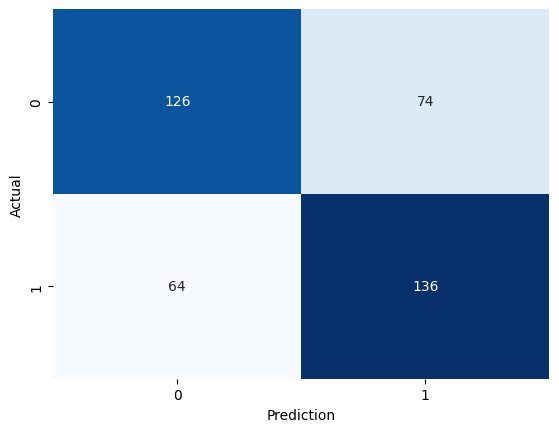

time: 126 ms (started: 2024-07-12 23:45:36 +00:00)


In [33]:
print_metrics(y_test,y_pred)

In [34]:
X_test.shape

(400, 224, 224, 3)

time: 2.89 ms (started: 2024-07-12 23:45:36 +00:00)


In [35]:
sample = np.random.randint(400,size=25)

time: 461 µs (started: 2024-07-12 23:45:36 +00:00)


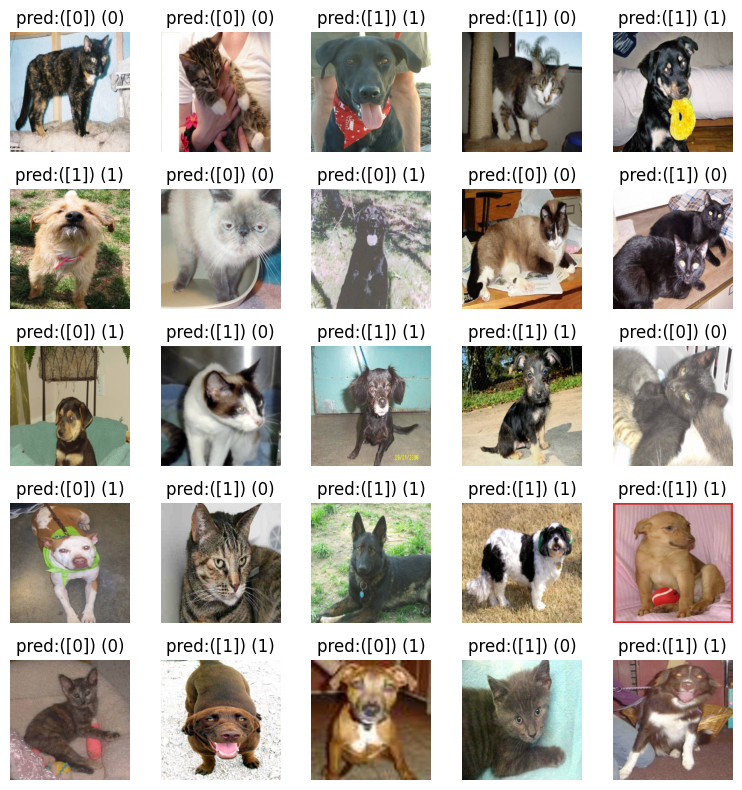

time: 5.14 s (started: 2024-07-12 23:45:36 +00:00)


In [36]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5,i+1) # 25개 grid
  plt.imshow(X_test[idx],cmap='gray')
  plt.title(f'pred:({y_pred[idx]}) ({y_test[idx]})') # 정답값 표시
  plt.axis('off')
  plt.tight_layout()
plt.show()

